# O'Hare International Airport Flight Data Analysis

In this notebook, I analyzed the [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120) provided by Bureau of Transportation Statistics (BTS). This dataset includes information about on-time arrival and departure data by month and year, by carrier and by origin and destination airport. It also includes scheduled and actual departure and arrival times, canceled and diverted flights, taxi-out and taxi-in times, causes of delay and cancellation, air time, and non-stop distance.

In [40]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_flight = pd.read_csv('79079101_T_ONTIME_REPORTING.csv')

In [37]:
df_flight.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,ARR_TIME,Unnamed: 8
0,2020,1,17,5,13232,MDW,"Chicago, IL",1418.0,NaN
1,2020,1,17,5,13232,MDW,"Chicago, IL",1056.0,NaN
2,2020,1,17,5,13232,MDW,"Chicago, IL",NaN,NaN
3,2020,1,17,5,13232,MDW,"Chicago, IL",NaN,NaN
4,2020,1,17,5,13232,MDW,"Chicago, IL",1305.0,NaN


# Data Cleaning

In [57]:
df_flight_ORD=df_flight.loc[df_flight['DEST_AIRPORT_ID'] == 13930]
df_flight_ORD.dropna(subset=['ARR_TIME'],inplace= True)

# Total number of flight arrivals at each hour

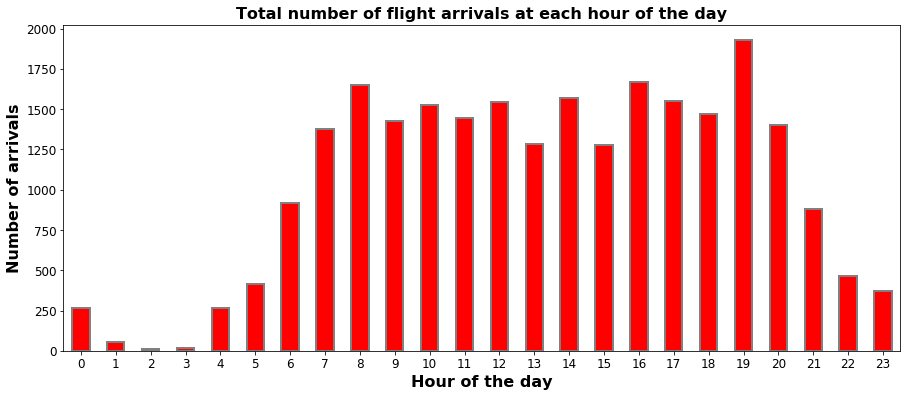

In [56]:
df_flight_ORD['ARR_TIME']=df_flight_ORD['ARR_TIME']/100
df_flight_ORD['ARR_TIME']=df_flight_ORD['ARR_TIME'].astype(int)
df_flight_ORD.loc[(df_flight_ORD.ARR_TIME == 24),'ARR_TIME']=0
plt.figure(figsize=(15, 6)) 
df_flight_ORD.ARR_TIME.value_counts().sort_index().plot(kind='bar',color=["red"],edgecolor=["gray"] ,align='center',width=0.5,linewidth=2)
plt.xlabel("Hour of the day",fontsize=16, fontweight='bold')
plt.xticks(rotation='horizontal')
plt.ylabel("Number of arrivals",fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total number of flight arrivals at each hour of the day",fontsize=16, fontweight='bold');

#### Observation:

This indicates that the highest number of flight arrivals ocuurs at 7 p.m. which is in agreement with the highest number of taxi pickups at O'Hare International Airport occuring at 8 p.m provided in the Chicago_TAXI notebook.

# Total number of flight arrivals on each day of the week

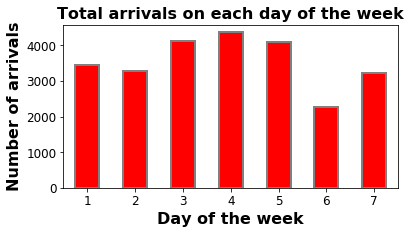

In [52]:
plt.figure(figsize=(6, 3)) 
df_flight_ORD.DAY_OF_WEEK.value_counts().sort_index().plot(kind='bar',color=["red"],edgecolor=["gray"] ,align='center',width=0.5,linewidth=2)
plt.xlabel("Day of the week",fontsize=16, fontweight='bold')
plt.xticks(rotation='horizontal')
plt.ylabel("Number of arrivals",fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total arrivals on each day of the week",fontsize=16, fontweight='bold');

#### Observation:

This shows the number of flight arrivals at O'Hare International Airport is on Thursdays, and the lowest number of arrivals is on Saturday.